<!--HEADER-->
[*Guia de aulas da disciplina de Modelagem Matemática*](https://github.com/rmsrosa/modelagem_matematica) *do* [*IM-UFRJ*](https://www.im.ufrj.br).

<!--NAVIGATOR-->

<a href="https://colab.research.google.com/github/rmsrosa/modelagem_matematica/blob/modmat2019p1/aulas/05.00-Aula5.ipynb"><img align="left" src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open in Colab" title="Open and Execute in Google Colaboratory"></a>
&nbsp;
<a href="https://mybinder.org/v2/gh/rmsrosa/modelagem_matematica/modmat2019p1?filepath=aulas/05.00-Aula5.ipynb"><img align="left" src="https://mybinder.org/badge.svg" alt="Open in binder" title="Open and Execute in Binder"></a>
&nbsp;
<a href="https://nbviewer.jupyter.org/github/rmsrosa/modelagem_matematica/blob/modmat2019p1/aulas/05.00-Aula5.slides.html"><img align="left" src="https://rmsrosa.github.io/jupyterbookmaker/badges/slides_badge.svg" alt="Open slides" title="Open and View Slides"></a>
&nbsp;

[<- Aula 4: Estimativa básica de propagação de erros experimentais](04.00-Aula4.ipynb) | [Página Inicial](00.00-Pagina_Inicial.ipynb) | [Aula 6: Regressão semi-linear, ajustes de ordem mais alta e critérios de seleção do ajuste ->](06.00-Aula6.ipynb)

---


# Aula 5: Incerteza e intervalos e graus de confiança

### Objetivos

- Revisitar a ideia de intervalos e graus de confiança para balizar a incerteza nos dados
- Ilustrar os resultados que fundamentam essa ideia:
    - Teorema do limite central
    - Distribuição t de Student
- Aplicação na análise do pêndulo

## Importando bibliotecas e definindo funções a serem usadas abaixo

In [1]:
import numpy as np
import scipy.stats as stats
import math

import matplotlib.pyplot as plt

import matplotlib.patches as patches
import matplotlib.path as mtl_path

from matplotlib import animation
from matplotlib.animation import PillowWriter
from matplotlib.animation import FFMpegWriter

from os import path
import io, base64
from IPython.display import Image, HTML

print('Acceptable image embeddings:', Image._ACCEPTABLE_EMBEDDINGS)

def path_files_aula5(filename):
    return path.join('..', 'dados', 'incertezas', filename)

Acceptable image embeddings: ['jpeg', 'png', 'gif']


## Relembrando: incertezas e intervalos e graus de confiança

Consideramos uma distribuição de probabilidades $\mathcal{P}$ qualquer, com média $\mu$ e desvio padrão $\sigma$. Dada uma amostra $q_1, \ldots, q_N$ dessa distribuição, definimos o **valor médio da amostra**, o **desvio padrão corrigido da amostra** e o **erro padrão da amostra** por

$$ \bar q = \frac{q_1 + \ldots + q_N}{N}, \qquad s = \sqrt{\frac{1}{N-1}\sum_i (q_{i}-\bar q)^2} \qquad \text{e} \qquad \Delta q  = \frac{s}{\sqrt{N}}.
$$

Com base na média e no erro padrão, temos vários **intervalos de confiança**. Por exemplo, no caso de amostras com vários dados, temos os intervalos

$$ I_{68\%} = [\bar q - \Delta q, \;\bar q + \Delta q] \qquad I_{95\%} = [\bar q - 2\Delta q, \;\bar q + 2\Delta q],
$$

**Observação:** na prática, as barras de erro costumam ser feitas com um ou outro intervalo de confiança, mas é fundamental indicar qual deles está usando. Como a relação é simples, é fácil inferir um do outro.

## Significado do intervalo de confiança

Em geral, não temos conhecimento sobre a distribuição de probabilidades $\mathcal{P}$ que estamos buscando acessar, nem, em particular, à sua média. O **intervalo de confiança** é um intervalo que indica onde essa média real pode estar.

O **grau de confiança** não indica a probabilidade da média real estar nesse intervalo, mas, sim, a probabilidade desse intervalo conter essa média. Dito de outra forma mais clara, se escolhermos (aleatoriamente e independentemente) $M$ coleções de $N$ dados e analisarmos os $M$ intervalos de $95\%$ de confiança associados a essa coleção, então $95\%$ desses $M$ intervalos deve conter a média real.

## Embasamento:

### O teorema do limite central

Considere uma distribuição de probabilidades $\mathcal{P}$ qualquer, como na situação descrita anteriormente. Suponha que retiremos uma coleção de amostras a partir dessa distribuição, com cada amostra contendo $N$ dados cada, com as amostras e os dados escolhidos de forma aleatória e independente. Tome a média aritmética de cada uma dessas amostras, que denotamos, aqui, por $\bar q_N$, para explicitar a dependência em $N$. Então, o teorema do limite central garante que a distribuição de probabilidades *dessas* médias $\bar q_N$ se aproxima de uma normal, conforme $N$ aumenta.

### Mais precisamente

Se $\mu$ e $\sigma$ são a média e o desvio padrão da distribuição de probabilidades $\mathcal{P}$ desconhecida e se $\mathcal{Q}_N$ é a distribuição de probabilidades das médias das amostras, então temos a convergência (em probabilidade e quase sempre)

$$ \sqrt{N}(\mathcal{Q}_N - \mu) \rightarrow \mathcal{N}(0,\sigma^2).
$$

Isso significa que a distribuição de probabilidades $\mathcal{S}_N$ das médias $\bar q_N$ está cada vez mais próxima de uma normal com média $\mu$ e desvio padrão $\sigma/\sqrt{N}$, i.e.
$$ \mathcal{Q}_N \sim \mathcal{N}\left(\mu,\frac{\sigma^2}{N}\right).
$$

Observe que esse desvio padrão $\sigma/\sqrt{N}$ é semelhante ao erro $\Delta q_N$ que mencionamos acima.

### Aproximação prática e a correção de Bessel

No caso de $N$ "grande o suficiente", o desvio padrão $\sigma/\sqrt{N}$ é relativamente pequeno e há grande chance de uma amostra arbitrária ter média $\bar q_N$ muito próxima de $\mu$ e desvio padrão (sem correção) $\sigma_N$ próximo de $\sigma$. Nesse caso, é natural pensarmos em usar a aproximação

$$ \mathcal{Q}_N \sim \mathcal{N}\left(\bar q_N,\frac{\sigma_N^2}{N}\right).
$$

Há, no entanto, uma certa redundância no uso do desvio padrão não corrigido da amostra, já que podemos encontrar o valor de uma das amostras a partir da média e das $N-1$ amostras restantes. Ou seja, além de $\bar q_N$, o conjunto $q_1 - \bar q_N, \ldots, q_N-\bar q_N$ possui de $N-1$ graus de liberdade. 

Associado a isso, o desvio padrão não corrigido $\sigma_N$ *sempre* estima por por baixo o desvio padrão $\sigma$, a menos que $\bar q_N$ coincida com $\mu$. 

A correção de Bessel evita essa distorção tendenciosa, o que nos leva a uma aproximação melhor pela normal com desvio padrão dado pelo erro padrão da amostra:

$$ \mathcal{Q}_N \sim \mathcal{N}\left(\bar q_N, \Delta q_N \right).
$$


### Intervalos de confiança baseados na normal

Usando a aproximação de $\mathcal{Q}_N$ pela normal $\mathcal{N}(\bar q_N, \Delta q_N)$, temos os intervalos de $68\%$ e $95\%$ de confiança dados por

$$ I_{68\%} = [q_N - \Delta q_N, \bar q_N + \Delta q_N], \qquad I_{95\%} = [\bar q_N - 2\Delta q_N, \;\bar q_N + 2\Delta q_N]
$$

Podemos conferir isso usando a probabilidade normal implementada por `scipy.stats.norm` e usar a sua *função de distribuição acumulada* (a integral da função de distribuição a partir de $-\infty$):

In [2]:
normal = stats.norm()

print(f'{100*(normal.cdf(1) - normal.cdf(-1)):.1f}%')
print(f'{100*(normal.cdf(2) - normal.cdf(-2)):.1f}%')
print(f'{100*(normal.cdf(3) - normal.cdf(-3)):.1f}%')

68.3%
95.4%
99.7%


### Visualização dos intervalos de confiança baseados na normal

In [3]:
x_9999 = np.linspace(*normal.interval(0.9999), 400)
x_95, x_68 = np.linspace(*normal.interval(0.95), 400), np.linspace(*normal.interval(0.68), 400)
y_9999, y_95, y_68 = normal.pdf(x_9999), normal.pdf(x_95), normal.pdf(x_68)

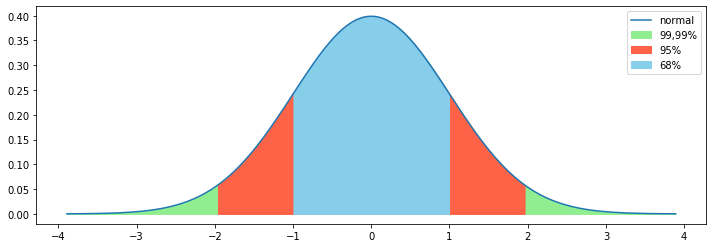

In [4]:
plt.figure(figsize=(12,4))
plt.plot(x_9999, y_9999, label='normal')
plt.fill_between(x_9999, 0, y_9999, color='lightgreen', label='99,99%')
plt.fill_between(x_95, 0, y_95, color='tomato', label='95%')
plt.fill_between(x_68, 0, y_68, color='skyblue', label='68%')
plt.legend()
plt.show()

## Amostras com poucos dados e a distribuição-t de Student

No caso de amostras com poucos dados, a média $\bar q_N$ e o desvio padrão corrigido $s_N$ podem não estar muito próximos de $\mu$ e $\sigma$. Esse caso foi estudado por um estatístico que publicava com o pseudônimo de Student e que chegou até essa distribuição-t (também conhecida como "t de Student") *no caso em que a distribuição inicial, que gera essas amostras, é uma normal.*

A distribuição-t tem um parâmetro real $\nu>0$ que é chamado de **graus de liberdade**, motivado pela associação com o número $N-1$ que vem da amostra. Denotamos essa distribuição por $t_\nu$. A sua função de densidade de probabilidades é dada por

$$ f_\nu(q) = \frac{\Gamma(\frac{\nu+1}{2})} {\sqrt{\nu\pi}\,\Gamma(\frac{\nu}{2})} \left(1+\frac{q^2}{\nu} \right)^{-(\frac{\nu+1}{2})},
$$
onde $\Gamma$ é a função gamma.

A densidade $f_\nu$ é simétrica em relação a origem. A média da distribuição-t é zero, quando $\nu>1$, e é indefinida, caso $0<\nu\leq 1$. A sua variância é $\nu/(\nu-2)$, caso $\nu>2$, infinita, caso $1<\nu\leq 2$, e indefinida, caso $0<\nu<0$.

### Gráfico da função de densidade de probabilidade de t

A figura a seguir exibe o gráfico da função de densidade da distribuição t com vários graus de liberdade e em comparação com a normal.

In [5]:
nu = [2,3, 4,8,20]
dist_t = [stats.t(nuj) for nuj in iter(nu)]
t_pdf = [dist_t[j].pdf(x_9999) for j in range(len(dist_t))]

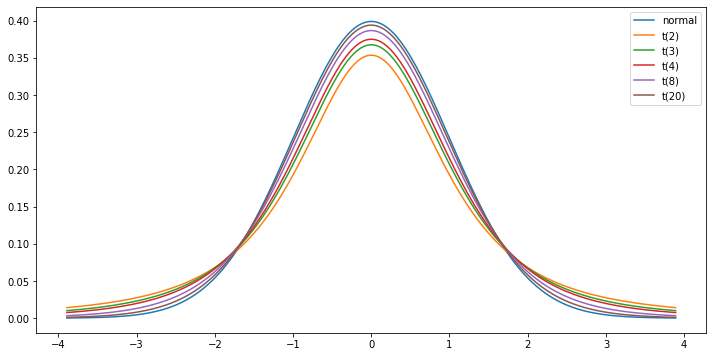

In [6]:
plt.figure(figsize=(12,6))

plt.plot(x_9999, y_9999, label='normal')
for j in range(len(dist_t)):
    plt.plot(x_9999, t_pdf[j], label=f't({nu[j]})')
plt.legend()
plt.show()

### O resultado de Student

O resultado de Student vale quando a distribuição inicial $\mathcal{P}$ é uma normal. Nesse caso, temos que a distribuição $\mathcal{Q}_N$ das médias $\bar q_N$ satisfaz

$$ \frac{\sqrt{\nu}}{s_N} (\mathcal{Q}_N -\mu) = t_\nu,
$$

com o grau de liberdade dado por $\nu=N-1$. De outra forma, temos

$$ \mathcal{Q}_N = \mu + \frac{s_N}{\sqrt{N-1}}t_{N-1}.
$$

Quando $N\geq 3$, temos $\nu = N-1\geq 2$, de forma que $\mathcal{Q}_N$ tem média $\mu$ e variância $\nu/(\nu-2)$.

### Intervalos de confiança baseados na distribuição t

O formato da distribuição t parece bem próximo do da normal, só com a cauda um pouco mais grossoa. Mas isso é significativo e pode alterar bastante o intervalo de confiança sendo três ou quatro ou mais vezes mais largo comparado com o da normal. 

Para $N$ grande, a distribuição-t se aproxima da normal e as duas aproximações são essencialmnte indiferentes.

In [7]:
print('meio-comprimento do intervalo de 95% de confiança:')
for j in range(len(dist_t)):
    intervalo = dist_t[j].interval(0.95)
    meia_distancia = (intervalo[1]-intervalo[0])/2
    print(f't({nu[j]}): {meia_distancia:.2f}')    

meio-comprimento do intervalo de 95% de confiança:
t(2): 4.30
t(3): 3.18
t(4): 2.78
t(8): 2.31
t(20): 2.09


### Visualizando a variação do intervalo de confiança

In [8]:
xt_95 = [np.linspace(*dist_t[j].interval(0.95), 400) for j in range(len(dist_t))]
dist_t95 = [dist_t[j].pdf(xt_95[j]) for j in range(len(dist_t))]

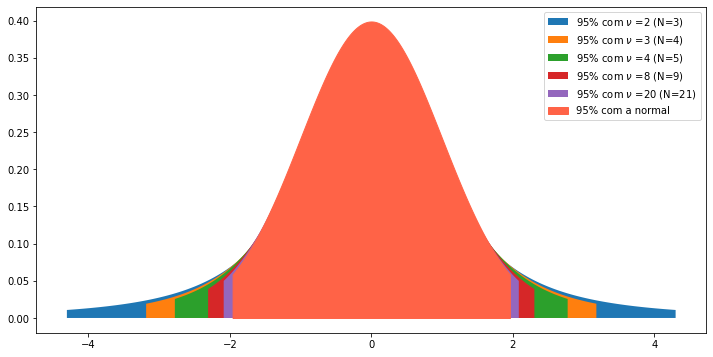

In [9]:
plt.figure(figsize=(12,6))
for j in range(len(dist_t)):
    plt.fill_between(xt_95[j], 0, dist_t95[j], label=r'95% com $\nu$ ='+f'{nu[j]} (N={nu[j]+1})')
plt.fill_between(x_95, 0, y_95, color='tomato', label='95% com a normal')
plt.legend()
plt.show()

### Em resumo

- Quando temos um número razoável de dados, podemos considerar $2\Delta q$ como o *meio-comprimento* do intervalo de $95\%$ de confiança.

- Quando temos poucos dados, o mais correto é usar o múltiplo apropriado de $\Delta q$ dado pelo intervalo de $95\%$ de confiança da distribuição t. 

- Nesse último caso, também se pode graficar com $2\Delta q$, explicitar que está se usando $2\Delta q$, mas que o intervalo de 95\% de confiança é um múltiplo desse dado, com esse múltiplo dado por uma tabela como feita acima, dependendo do número de dados na amostra.

- Quanto à teoria, o teorema do limite central vale para uma distribuição desconhecida $\mathcal{P}$ qualquer, enquanto que o resultado de Student vale no caso dessa distribuição ser normal.

## Ilustração com animação

Podemos usar as várias probabilidades implementadas no módulo `scipy.stats`, detalhadas em [SciPy - Statistical functions](https://docs.scipy.org/doc/scipy/reference/stats.html), para ilustrar a convergência de $\mathcal{Q}_N$ a uma normal, para uma distribuição inical $\mathcal{P}$ qualquer. 

Abaixo, usamos a distribuição **normal** [scipy.stats.norm](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.norm.html) e a distribuição **beta** [scipy.stats.beta](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.beta.html).

As animações foram feitas com o módulo [matplotlib.pyplot.animation](https://matplotlib.org/api/animation_api.html).

### Escolhendo uma probabilidade, extraindo uma amostra e exibindo estatísticas

Começamos escolhendo uma distribuição de probabilidade:

In [10]:
Nx=1000

def define_probabilidade(prob_nome, params):
    if prob_nome == 'normal':
        probability = stats.norm(**params)
    elif prob_nome == 'beta':
        probability = stats.beta(**params)
    return probability, params

parametros = {
    'normal': {'loc': 3, 'scale': 0.5},
    'beta': {'a': 3, 'b': 10}
}

prob_nome = 'normal'

probability, params = define_probabilidade(prob_nome, parametros[prob_nome])

mean, variance = probability.stats(moments='mv')
sigma = np.sqrt(variance)

x_pdf = np.linspace(probability.ppf(0.001), probability.ppf(0.999), Nx)
y_pdf = probability.pdf(x_pdf)

### Gráfico da função de distribuição da probabilidade

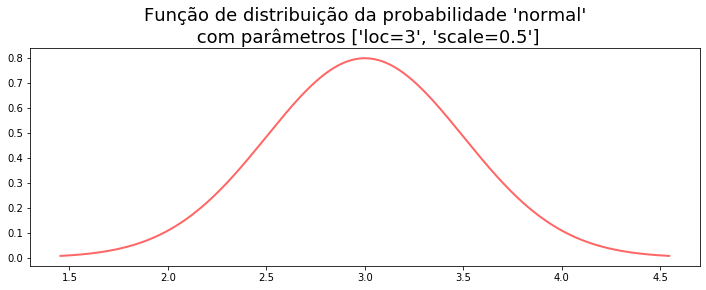

In [11]:
plt.figure(figsize=(12,4))
plt.plot(x_pdf, y_pdf,'r-', lw=2, alpha=0.6)
plt.title(f"Função de distribuição da probabilidade '{prob_nome}'\n com parâmetros {[f'{key}={value}' for key, value in parametros[prob_nome].items()]}", fontsize=18)
plt.savefig(path_files_aula5('funcao_distribuicao_da_probabilidade_'+prob_nome+'.png'), bbox_inches='tight', pad_inches=0.2,  dpi=150)

plt.show()


### Extraindo amostra

In [12]:
np.random.seed(14736122)

# Amostra

N = 2000
M = 5
K = int(N/M)

amostra = probability.rvs(N)
       
x_avg = np.mean(amostra)
x_loc_avg = np.array([np.mean(amostra[i*M:(i+1)*M]) for i in range(K)])
x_loc_std_corr = np.sqrt(M/(M-1))*np.array([np.std(amostra[i*M:(i+1)*M]) for i in range(K)])
x_loc_err = x_loc_std_corr/np.sqrt(M)
x_loc_avg_std = np.std(x_loc_avg)
x_log_avg_std_mean = np.mean(x_loc_std_corr)

### Exibindo algumas estatísticas

In [13]:
print(f'Média total das {N} amostras:', x_avg)
print(f'Média das primeiras {M} amostras:', x_loc_avg[0])
print(f'Desvio padrão das primeiras {M} amostras:', x_loc_std_corr[0])
print(f'Erro padrão das primeiras {M} amostras:', x_loc_err[0])
print(f'Intervalo de 66,4% de probabilidade: ({x_loc_avg[0] - x_loc_std_corr[0]},{x_loc_avg[0] + x_loc_std_corr[0]})')
print(f'Intervalo de 65% de confiança: ({x_loc_avg[0] - 0.96*x_loc_err[0]},{x_loc_avg[0] + 0.96*x_loc_err[0]})')
print(f'Média das médias de cada conjunto de {M} amostras: {np.mean(x_loc_avg)}')
print(f'Desvio padrão das {K} médias de cada conjunto de {M} amostras:', x_loc_avg_std)
print(f'Desvio padrão de cada conjunto de {M} amostras: {x_loc_avg_std}')
print(f'Média dos desvios padrão de cada conjunto de {M} amostras:', x_log_avg_std_mean)

print('\nObserve que a média total e a média das médias tem que coincidir, é só um teste de sanidade')

Média total das 2000 amostras: 2.9669652137393285
Média das primeiras 5 amostras: 2.7774223956836797
Desvio padrão das primeiras 5 amostras: 0.17257420738291107
Erro padrão das primeiras 5 amostras: 0.07717753177426705
Intervalo de 66,4% de probabilidade: (2.6048481883007684,2.949996603066591)
Intervalo de 65% de confiança: (2.703331965180383,2.851512826186976)
Média das médias de cada conjunto de 5 amostras: 2.966965213739328
Desvio padrão das 400 médias de cada conjunto de 5 amostras: 0.21416023503486875
Desvio padrão de cada conjunto de 5 amostras: 0.21416023503486875
Média dos desvios padrão de cada conjunto de 5 amostras: 0.4657300756775905

Observe que a média total e a média das médias tem que coincidir, é só um teste de sanidade


### Preparando animação

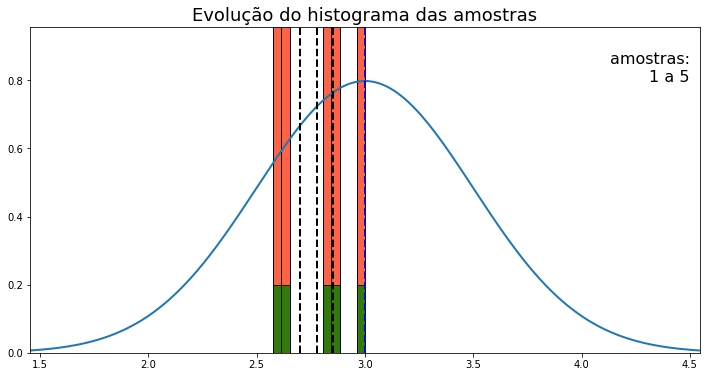

In [14]:
# histogram parameters

hist_range = (x_pdf[0],x_pdf[-1])
num_bins = 80

hist, bins = np.histogram(amostra[:M], bins=num_bins, range=hist_range)

# get the corners of the rectangles for the histogram
left = np.array(bins[:-1])
right = np.array(bins[1:])
bottom = np.zeros(len(left))
top = bottom + hist/M
nrects = len(left)

bin_length = right[0] - left[0]

nverts = nrects * (1 + 3 + 1)
verts = np.zeros((nverts, 2))
codes = np.ones(nverts, int) * mtl_path.Path.LINETO
codes[0::5] = mtl_path.Path.MOVETO
codes[4::5] = mtl_path.Path.CLOSEPOLY
verts[0::5, 0] = left
verts[0::5, 1] = bottom
verts[1::5, 0] = left
verts[1::5, 1] = top
verts[2::5, 0] = right
verts[2::5, 1] = top
verts[3::5, 0] = right
verts[3::5, 1] = bottom

vertsN = np.zeros((nverts, 2))
vertsN[0::5, 0] = left
vertsN[0::5, 1] = bottom
vertsN[1::5, 0] = left
vertsN[1::5, 1] = top
vertsN[2::5, 0] = right
vertsN[2::5, 1] = top
vertsN[3::5, 0] = right
vertsN[3::5, 1] = bottom

patch = None
patchN = None

# prepare for animation

num_frames = 50

def animate(i):
    if i < 10:
        J = 1
    elif i < 15:
        J = 2
    elif i < 20:
        J = min(4, int(K/num_frames))
    else:
        J = int(K/num_frames)
    hist, bins = np.histogram(amostra[i*J*M:(i*J+1)*M], bins=num_bins, range=hist_range)
    histN, binsN = np.histogram(amostra[:(i*J+1)*M], bins=num_bins, range=hist_range)
    top = bottom + hist/sum(hist)
    verts[1::5, 1] = top
    verts[2::5, 1] = top
    topN = bottom + histN/sum(histN)/bin_length
    vertsN[1::5, 1] = topN
    vertsN[2::5, 1] = topN
    avg_loc_line.set_xdata([x_loc_avg[i],x_loc_avg[i]])
    avg_loc_minus_error.set_xdata([x_loc_avg[i]-x_loc_err[i],x_loc_avg[i]-x_loc_err[i]])
    avg_loc_plus_error.set_xdata([x_loc_avg[i]+x_loc_err[i],x_loc_avg[i]+x_loc_err[i]])
    anotacao.set_text(f'amostras:\n{i*J*M+1} a {(i*J+1)*M}')
    return [patchN, patch, avg_loc_line, avg_loc_minus_error, avg_loc_plus_error, anotacao, ]

fig, ax = plt.subplots(figsize=(12,6))
barpath = mtl_path.Path(verts, codes)
patch = patches.PathPatch(barpath, facecolor='green', edgecolor='black', alpha=0.8)

barpathN = mtl_path.Path(vertsN, codes)
patchN = patches.PathPatch(barpathN, facecolor='tomato', edgecolor='black', alpha=1)

line, = ax.plot(x_pdf, y_pdf, lw=2)
avg_line = ax.axvline(mean, linestyle='--', color='blue', lw=2)
#avg_loc_line_0 = ax.axvline(x_loc_avg[0], linestyle='--', color='green', lw=2)
avg_loc_line = ax.axvline(x_loc_avg[0], linestyle='--', color='black', lw=2)
avg_loc_minus_error = ax.axvline(x_loc_avg[0] - x_loc_err[0], linestyle='--', color='black', lw=2)
avg_loc_plus_error = ax.axvline(x_loc_avg[0] + x_loc_err[0], linestyle='--', color='black', lw=2)

ax.add_patch(patchN)
ax.add_patch(patch)

anotacao = ax.annotate(f'amostras:\n{1} a {M}', xy=(0.99*x_pdf[-1],np.max(y_pdf)), ha='right', fontsize=16)
#anotacao.set_animated(True)

ax.set_xlim(x_pdf[0], x_pdf[-1])
ax.set_ylim(0,1.2*np.max(y_pdf))

plt.title('Evolução do histograma das amostras', fontsize=18)

anim = animation.FuncAnimation(fig, animate, frames = num_frames, repeat=False, blit=True)

plt.show()

### Exibindo animação

In [15]:
HTML(anim.to_jshtml())

### Gravando a animação em disco

Abaixo, gravamos a animação em formato "gif". E, se o [ffmpeg](https://ffmpeg.org) estiver sido instalado no sistema, gravamos, também, em formato "mp4", que usa bem menos memória.

In [16]:
anim.save(path_files_aula5('animacao_histograma_'+prob_nome+'.gif'), writer=PillowWriter(fps=2))
mp4_sucesso = False
try:
    anim.save(path_files_aula5('animacao_histograma_'+prob_nome+'_2.mp4'), writer=FFMpegWriter(fps=2))
    mp4_sucesso = True
    print('Sucesso gravando em formato "mp4".')
except:
    print('Não foi possível gravar em formato "mp4".')

Sucesso gravando em formato "mp4".


A animação em "gif" também pode ser transformada em "mp4" usando `ffmpeg` do shell, tanto de um terminal como usando o comando mágico `%sx` do Jupyter como feito a seguir:

In [17]:
arquivo_gif = path_files_aula5('animacao_histograma_'+prob_nome+'.gif')
arquivo_mp4 = path_files_aula5('animacao_histograma_'+prob_nome+'.mp4')
%sx ffmpeg -i $arquivo_gif -vf format=yuv420p -y $arquivo_mp4

['ffmpeg version N-93461-g6e42021128-tessus  https://evermeet.cx/ffmpeg/  Copyright (c) 2000-2019 the FFmpeg developers',
 '  built with Apple LLVM version 10.0.1 (clang-1001.0.46.3)',
 '  configuration: --cc=/usr/bin/clang --prefix=/opt/ffmpeg --extra-version=tessus --enable-avisynth --enable-fontconfig --enable-gpl --enable-libaom --enable-libass --enable-libbluray --enable-libdav1d --enable-libfreetype --enable-libgsm --enable-libmodplug --enable-libmp3lame --enable-libmysofa --enable-libopencore-amrnb --enable-libopencore-amrwb --enable-libopenh264 --enable-libopenjpeg --enable-libopus --enable-librubberband --enable-libshine --enable-libsnappy --enable-libsoxr --enable-libspeex --enable-libtheora --enable-libtwolame --enable-libvidstab --enable-libvo-amrwbenc --enable-libvorbis --enable-libvpx --enable-libwavpack --enable-libwebp --enable-libx264 --enable-libx265 --enable-libxavs --enable-libxvid --enable-libzimg --enable-libzmq --enable-libzvbi --enable-version3 --pkg-config-flag

### Exibindo a animação

In [18]:
if mp4_sucesso:
    video = io.open(path_files_aula5('animacao_histograma_'+prob_nome+'.mp4'), 'r+b').read()
    encoded = base64.b64encode(video)
    video_data = '''<video width="100%" alt="test" controls><source src="data:video/mp4;base64,{0}" type="video/mp4" />
                    </video>'''.format(encoded.decode('ascii'))
else:
    video_data = "<img src='" + path_files_aula5('animacao_histograma_'+prob_nome+'.mp4')+"'/>"

HTML(data=video_data)

### Histograma das médias de cada grupo de amostras

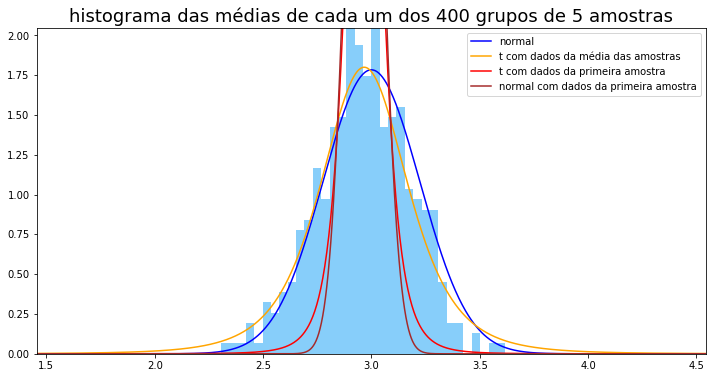

In [19]:
plt.figure(figsize=(12,6))

cor_hist = 'lightskyblue'
cor_linhas_hist = 'blue'

n, bins, patches = plt.hist(x_loc_avg, density=True, color=cor_hist, bins=num_bins, range=hist_range)

y_loc_pdf = stats.norm.pdf(x_pdf, mean, sigma/np.sqrt(M))
z_loc_pdf = stats.t.pdf(x_pdf, M-1, loc = mean, scale = sigma/np.sqrt(M))
w_loc_pdf = stats.t.pdf(x_pdf, M-1, loc = x_avg, scale = np.mean(x_loc_err))
u_loc_pdf = stats.norm.pdf(x_pdf, loc=x_avg, scale=x_loc_err[0])
v_loc_pdf = stats.t.pdf(x_pdf, M-1, loc = x_avg, scale = x_loc_err[0])

plt.plot(x_pdf, y_loc_pdf, color='blue', label = 'normal')
#plt.plot(x_pdf, z_loc_pdf, color='green', label = 't com dados da normal')
plt.plot(x_pdf, w_loc_pdf, color='orange', label = 't com dados da média das amostras')
plt.plot(x_pdf, v_loc_pdf, color='red', label = 't com dados da primeira amostra')
plt.plot(x_pdf, u_loc_pdf, color='brown', label = 'normal com dados da primeira amostra')

plt.xlim(x_pdf[0], x_pdf[-1])
plt.ylim(0,1.1/np.sqrt(2*np.pi)/x_loc_avg_std)

plt.legend()
plt.title(f'histograma das médias de cada um dos {K} grupos de {M} amostras', fontsize=18)
plt.savefig(path_files_aula5('histograma_medias_locais_'+prob_nome+'.png'), bbox_inches='tight', pad_inches=0.2,  dpi=150)

plt.show()

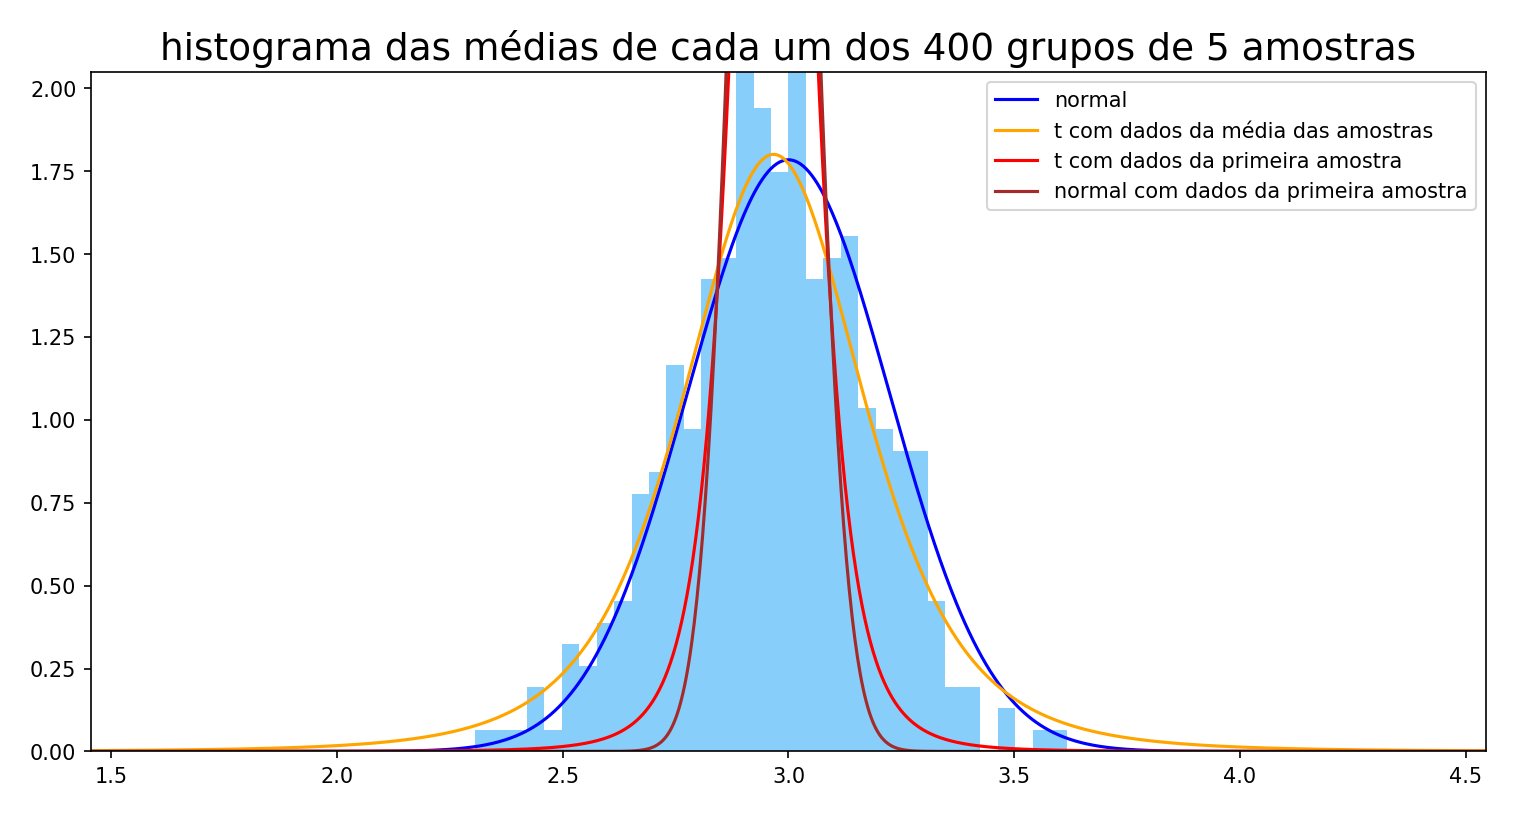

In [20]:
Image(path_files_aula5('histograma_medias_locais_'+prob_nome+'.png'))

## Início da lista de exercícios

Para cada comprimento $l$, pegar o arquivo correspondente dos dados do movimento do pêndulo (iluminância e proximidade) e fazer as seguintes análises:

1. Extrair dos dados uma coleção de instantes $(t_1, ... , t_n)$ entre cada dois mínimos (pontos de proximidade), ou cada dois máximos (longe do sensor), que são informações sobre o período do movimento (a cada dois pois o pêndulo passa a cada meio-período sobre o sensor). Pode desprezar os *outliers*.
1. Plotar esta amostra em um histograma.
1. Achar a média $\bar t$ e o desvio padrão corrigido $s_t$ dessa amostra.
1. Achar o erro padrão $\Delta t$ desta quantidade.
1. Extrair coleções de poucos dados da amostra, digamos 
$$ T_i = \{t_{3*(i-1)}, t_{3*(i-1) + 1}, t_{3*(i-1)+2}\}
$$
1. Para cada amostra $T_i$, retirar a sua média $E(T_i)$ e fazer um histograma dessas médias.
1. Calcular a média e o desvio padrão corrigido das médias $E[T_i)]$
1. Verificar se esse histograma está mais próximo de uma normal ou uma distribuição t.

## Continuação da lista de exercícios

Juntando a análise anterior de todos os comprimentos:

1. Fazer uma figura com os valores encontrados $(\ell_i, \bar t_i)$, para cada comprimento considerado $\ell_i$ e cada período médio correspondente $\bar t_i$, incluindo as barras de erro assumindo $1\%$ na estimativa de $\ell_i$ e barras com um intervalo de confiança $\bar t_i - 2 \Delta t_i,$ correspondendo a um grau de confiança da ordem de $95\%$.
1. Fazer uma regressão dos valores $t$ versus $l$ do tipo $l = a (2t)^2$.
1. Estimar a incerteza induzida na quantidade $a = a(t,l)$.
1. Deduzir $g$ usando $a$ e comparar a estimativa do erro com a que vem dos $l$'s individuais, concluindo com qual método é mais preciso.

---

### Apresentação em slides

Para visualizar na forma de slides, abrir um "terminal" *bash* e usar a linha de comando
```bash
jupyter nbconvert 05.00-Aula5.ipynb --to slides --post serve
```

Se quiser adicionar a possibilidade de rolar a página, caso algum *slide* seja muito longo, incluir a opção
```bash
--SlidesExporter.reveal_scroll=True
```

Para usar um tema diferente do padrão, temos a configuração via `SlidesExporter.reveal_theme`. Os temas disponíveis são `beige`, `black`, `blood`, `league`, `moon`, `night`, `serif`, `simple`, `sky`, `solarized`, `white`. O padrão é `white`. Um tema interessante é
```bash
--SlidesExporter.reveal_theme=solarized
```

Para usar um efeito de transição diferente do padrão, temos a configuração via `SlidesExporter.reveal_transition`. As opções são `none`, `fade`, `slide`, `convex`, `concave` e `zoom`. O padrão é `slide`. Uma transição interessante é 
```bash
--SlidesExporter.reveal_transition=convex
```

Mais informações sobre o `nbconvert` em [Configuration options (for nbconvert)](https://nbconvert.readthedocs.io/en/latest/config_options.html) e [Present Your Data Science Projects with Jupyter Notebook Slides!](https://medium.com/learning-machine-learning/present-your-data-science-projects-with-jupyter-slides-75f20735eb0f)

In [21]:
!jupyter nbconvert 05.00-Aula5.ipynb --to slides --SlidesExporter.reveal_scroll=True

[NbConvertApp] Converting notebook 05.00-Aula5.ipynb to slides
[NbConvertApp] Writing 3264412 bytes to 05.00-Aula5.slides.html


<!--NAVIGATOR-->

---
[<- Aula 4: Estimativa básica de propagação de erros experimentais](04.00-Aula4.ipynb) | [Página Inicial](00.00-Pagina_Inicial.ipynb) | [Aula 6: Regressão semi-linear, ajustes de ordem mais alta e critérios de seleção do ajuste ->](06.00-Aula6.ipynb)

<a href="https://colab.research.google.com/github/rmsrosa/modelagem_matematica/blob/modmat2019p1/aulas/05.00-Aula5.ipynb"><img align="left" src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open in Colab" title="Open and Execute in Google Colaboratory"></a>

<a href="https://mybinder.org/v2/gh/rmsrosa/modelagem_matematica/modmat2019p1?filepath=aulas/05.00-Aula5.ipynb"><img align="left" src="https://mybinder.org/badge.svg" alt="Open in binder" title="Open and Execute in Binder"></a>

<a href="https://nbviewer.jupyter.org/github/rmsrosa/modelagem_matematica/blob/modmat2019p1/aulas/05.00-Aula5.slides.html"><img align="left" src="https://rmsrosa.github.io/jupyterbookmaker/badges/slides_badge.svg" alt="Open slides" title="Open and View Slides"></a>
&nbsp;